In [2]:
import json
from augur.utils import json_to_tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [1]:
def count_paired_sequences(virus, segment= 'ha'):
    """
    Find how many egg-passaged sequences have a paired non-egg-passaged sequence
    """
    
    tree_file = f'../nextstrain_builds/egg-enriched/auspice/{virus}_{segment.lower()}_egg.json'

    with open(tree_file) as json_handle:
        tree_json = json.load(json_handle)

    tree = json_to_tree(tree_json)
    
    num_egg_seqs = 0
    egg_seq_names = []
    
    for node in tree.find_clades(terminal=True):
        if node.node_attrs['passage_category']['value']=='egg':
            num_egg_seqs+=1
            egg_seq_names.append(node.name)
            
    potential_pair_names = [x.strip('-egg') for x in egg_seq_names]
    num_egg_seqs_w_pair = 0
    
    for node in tree.find_clades(terminal=True):
        if node.node_attrs['passage_category']['value']!='egg':
            if node.name in potential_pair_names:
                num_egg_seqs_w_pair+=1
    
    return num_egg_seqs, num_egg_seqs_w_pair
            

In [3]:
w_pair_cmap = {'h3n2': '#fbba0a', 'h1n1pdm': '#FF4500', 'vic': '#088F8F', 'yam':'#45b6fe'}
wo_pair_cmap = {'h3n2': '#fde39d', 'h1n1pdm': '#ffa27f', 'vic': '#83c7c7', 'yam':'#a2dafe'}

In [4]:
def plot_num_egg_seqs_w_pair(viruses, filename=None):
    """
    plot the total number of egg sequences and show the number that have a non-egg-passaged pair
    """
    
    egg_seqs_w_pair = []
    egg_seqs_wo_pair = []
    
    to_plot = []
    
    for v in viruses:
        num_egg_seqs, num_egg_seqs_w_pair = count_paired_sequences(v)
        egg_seqs_w_pair.append(num_egg_seqs_w_pair)
        egg_seqs_wo_pair.append(num_egg_seqs-num_egg_seqs_w_pair)
        to_plot.append({'virus': v, 'total': num_egg_seqs, 
                        'w_pair': num_egg_seqs_w_pair, 'wo_pair': num_egg_seqs-num_egg_seqs_w_pair})
#         to_plot.append({'virus': v, 'count': num_egg_seqs-num_egg_seqs_w_pair, 'category': 'w0_pair'})
    
    capitalized_names = {'h3n2': 'H3N2', 'h1n1pdm': 'H1N1pdm', 'vic': 'Vic', 'yam': 'Yam'}
    
    df = pd.DataFrame(to_plot)
    
    fig, ax = plt.subplots(figsize=(5,2))
    
    for i, row in df.iterrows():
        color_wpair = w_pair_cmap[row['virus']]
        color_wopair = wo_pair_cmap[row['virus']]
        pct_w_pair = round((row['w_pair']/row['total'])*100)
        pct_label = f'{pct_w_pair} %'
        rects1 = ax.bar(capitalized_names[row['virus']], row['w_pair'],  color=color_wpair)
        rects2 = ax.bar(capitalized_names[row['virus']], row['wo_pair'], 
                        bottom=row['w_pair'], color=color_wopair, label=pct_label)
        ax.bar_label(rects2, [str(pct_label)], padding=3)

    
    ax.set_ylabel('Number of\negg-passaged\nstrains', fontsize=14)
    ax.tick_params(axis='both', labelsize=14)
    ax.set_yticks([0,800,1600])
    
    dark_patch = mpatches.Patch(color='#737373', label='Pair')
    light_patch = mpatches.Patch(color='#d3d3d3', label='No pair')
    ax.legend(handles=[dark_patch, light_patch], bbox_to_anchor=(0.95, 1.0), bbox_transform=fig.transFigure)
    
    sns.despine()
    
    if filename:
        fig.savefig(filename, dpi=300, bbox_inches='tight', transparent=False, facecolor='white')

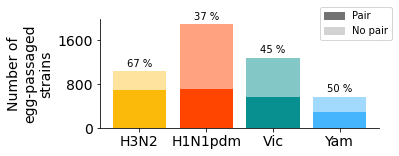

In [5]:
plot_num_egg_seqs_w_pair(['h3n2', 'h1n1pdm', 'vic', 'yam'])

In [6]:
def plot_num_egg_seqs_w_pair_horizontal(viruses, filename=None):
    """
    plot the total number of egg sequences and show the number that have a non-egg-passaged pair
    """
    
    egg_seqs_w_pair = []
    egg_seqs_wo_pair = []
    
    to_plot = []
    
    for v in viruses:
        num_egg_seqs, num_egg_seqs_w_pair = count_paired_sequences(v)
        egg_seqs_w_pair.append(num_egg_seqs_w_pair)
        egg_seqs_wo_pair.append(num_egg_seqs-num_egg_seqs_w_pair)
        to_plot.append({'virus': v, 'w_pair': num_egg_seqs_w_pair, 'wo_pair': num_egg_seqs-num_egg_seqs_w_pair})
#         to_plot.append({'virus': v, 'count': num_egg_seqs-num_egg_seqs_w_pair, 'category': 'w0_pair'})
    
    capitalized_names = {'h3n2': 'H3N2', 'h1n1pdm': 'H1N1pdm', 'vic': 'Vic', 'yam': 'Yam'}
    
    df = pd.DataFrame(to_plot)
    
    fig, ax = plt.subplots(figsize=(2,5))
    
    for i, row in df.iterrows():
        color_wpair = w_pair_cmap[row['virus']]
        color_wopair = wo_pair_cmap[row['virus']]
        ax.barh(capitalized_names[row['virus']], row['w_pair'],  color=color_wpair)
        ax.barh(capitalized_names[row['virus']], row['wo_pair'], left=row['w_pair'], color=color_wopair)

    
    ax.set_xlabel('Number of\negg-passaged strains', fontsize=14)
    ax.tick_params(axis='both', labelsize=14)
    ax.set_xticks([0,800,1600])
    
    dark_patch = mpatches.Patch(color='#737373', label='Pair')
    light_patch = mpatches.Patch(color='#d3d3d3', label='No pair')
    ax.legend(handles=[dark_patch, light_patch], bbox_to_anchor=(1.1, 0.3), bbox_transform=fig.transFigure)
    
    sns.despine()
    
    if filename:
        fig.savefig(filename, dpi=300, bbox_inches='tight', transparent=False, facecolor='white')